# SPACE EDA
## Introduction
Let's see if the data has potential for predictions using machine learning algorithms!
Link to data used: https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957/data ,
scraped from: https://nextspaceflight.com/launches/past/?page=1 .

## Import Libraries

In [1]:
import numpy as np # algebra
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Reading the Data
### Content:
- **Company Name**: Company
- **Location**: Launch Site
- **Datum**: Date and Time of Launch
- **Detail**: Rocket Name
- **Status Rocket**: Status of the rocket
- **Rocket**: Cost of the mission: in $ (million)
- **Status Mission**: Status of the mission (Success, failure...)


In [2]:
df = pd.read_csv("Space_Missions_Data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
# let's get rid of some useless columns (2 and 3)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
# data types
df.dtypes

Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [5]:
# how much data are we dealing with?
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [7]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [8]:
df.columns[5]

' Rocket'

In [9]:
# let's rename "Rocket" to something clearer
df.rename(columns={" Rocket": "Rocket Price"}, inplace=True)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Price,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Mission status

In [10]:
mission_status = df["Status Mission"].value_counts().reset_index()[:3]
mission_status

,Status Mission,count
0,Success,3879
1,Failure,339
2,Partial Failure,102


# Launches by Company

In [11]:
company_names = df["Company Name"].value_counts().reset_index()
company_names

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [12]:
fig = go.Figure(go.Bar(x = company_names["Company Name"],
                       y = company_names["count"],
                       width=0.75,
                       marker = dict( color = company_names["count"],
                                    colorscale = "tealrose")))

fig.update_layout(title = "Number of Launches by Every Company", xaxis_title = "Out of 56", yaxis_title = "count", hovermode = "x")
fig.show()

## Money Spent On Space Missions And Rocket Status

In [13]:
np.sum(pd.isna(df.loc[:, "Rocket Price"]))

3360

In [14]:
df_ = df.dropna(subset=["Rocket Price"], axis = "rows")
len(df_)

964

In [15]:
df_.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Price,Status Mission
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


In [16]:
np.sum(pd.isna(df_.loc[:,"Rocket Price"]))

0

In [17]:
df_.loc[:, "Rocket Price"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name: Rocket Price, Length: 964, dtype: object

In [18]:
df_.loc[:, "Rocket Price"] = df_.loc[:, "Rocket Price"].fillna(0.0).str.replace(",","")
df_.loc[:, "Rocket Price"] = df_.loc[:, "Rocket Price"].astype(np.float64).fillna(0.0)

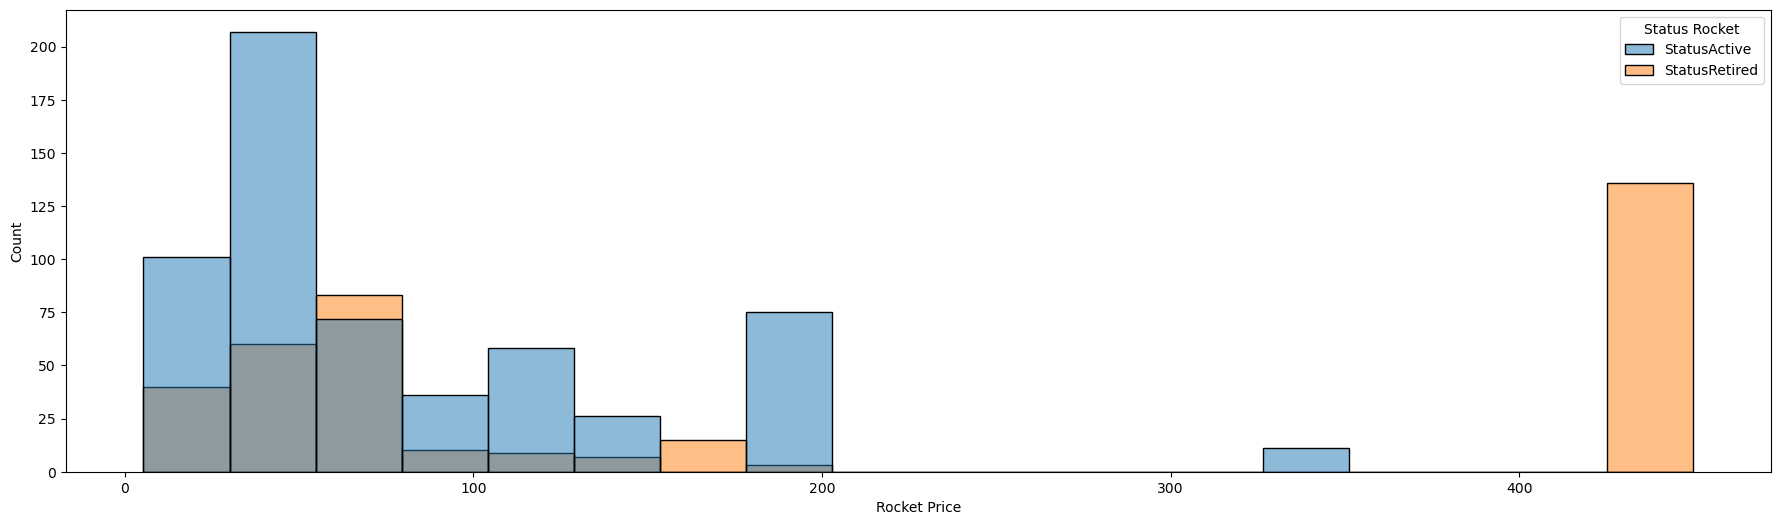

In [19]:
df_d = df_[df_.loc[:, "Rocket Price"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = "Rocket Price", hue = "Status Rocket")
plt.show()

## Money Spent On Space Missions and Mission Status

In [20]:
np.sum(pd.isna(df.loc[:, "Status Mission"]))

0

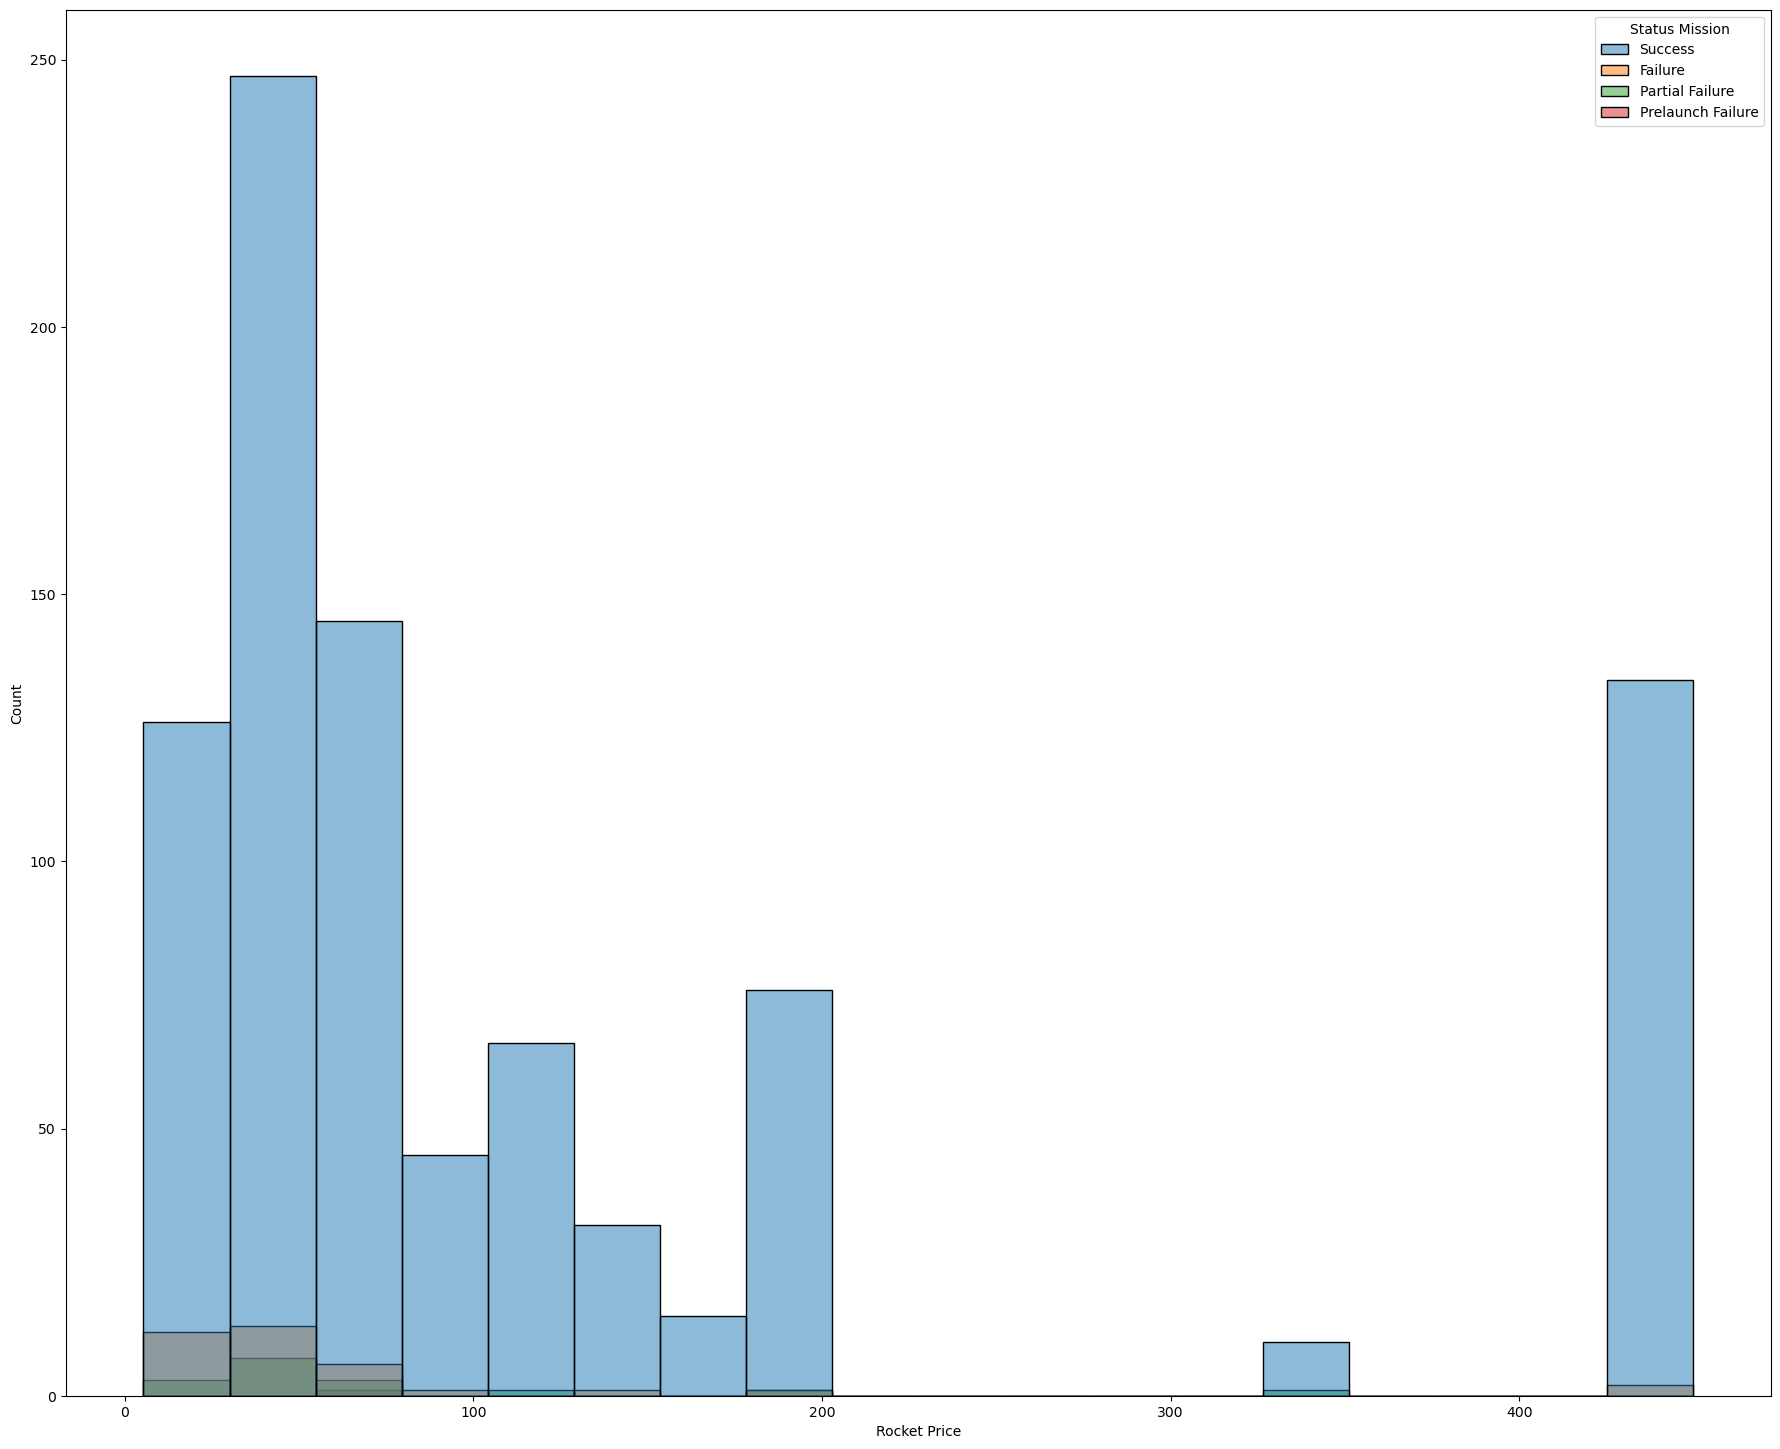

In [21]:
plt.figure(figsize=(22, 18))
sns.histplot(data=df_d, x = "Rocket Price", hue = "Status Mission")
plt.show()

## Total Money Spent

In [22]:
# Each company has spent some money on rockets
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Price,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [23]:
money_data = df_.groupby(["Company Name"])["Rocket Price"].sum().reset_index()
money_data = money_data[money_data["Rocket Price"] > 0] # get data that has rocket prices
money_data.head()

,Company Name,Rocket Price
0,Arianespace,16345.0
1,Boeing,1241.0
2,CASC,6340.26
3,EER,20.0
4,ESA,37.0


In [24]:
money_data = money_data.sort_values(by = ["Rocket Price"], ascending=False)[:]
money_data

,Company Name,Rocket Price
14,NASA,76280.0
0,Arianespace,16345.0
21,ULA,14798.0
16,RVSN USSR,10000.0
2,CASC,6340.26
20,SpaceX,5444.0
15,Northrop,3930.0
12,MHI,3532.5
8,ISRO,2177.0
22,US Air Force,1550.92


Looks like NASA has spent the most on their missions...

In [25]:
fig = px.bar(money_data, x = "Company Name", y = "Rocket Price", title = "Total Money Spent")
fig.show()

## Conclusion
- potential for predictions (money-success rate)
- may need more data (rocket weight per kg.)